In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

In [8]:
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
tf.reset_default_graph()

num_inputs = 784
neurons_hidden_layer1 = 392
neurons_hidden_layer2 = 196
neurons_hidden_layer3 = neurons_hidden_layer1
num_outputs = num_inputs
learning_rate = 0.01

activation_function = tf.nn.relu
X = tf.placeholder(tf.float32, shape=[None, num_inputs])
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs, neurons_hidden_layer1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hidden_layer1, neurons_hidden_layer2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hidden_layer2, neurons_hidden_layer3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hidden_layer3, num_outputs]), dtype=tf.float32)

b1 = tf.Variable(tf.zeros(neurons_hidden_layer1))
b2 = tf.Variable(tf.zeros(neurons_hidden_layer2))
b3 = tf.Variable(tf.zeros(neurons_hidden_layer3))
b4 = tf.Variable(tf.zeros(num_outputs))

hidden_layer1 = activation_function(tf.matmul(X,w1)+b1)
hidden_layer2 = activation_function(tf.matmul(hidden_layer1,w2)+b2)
hidden_layer3 = activation_function(tf.matmul(hidden_layer2,w3)+b3)
output_layer = activation_function(tf.matmul(hidden_layer3,w4)+b4)

In [10]:
loss = tf.reduce_mean(tf.square(output_layer - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
saver = tf.train.Saver()

num_epochs = 10
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict = {X:x_batch})
            
        training_loss = loss.eval(feed_dict={X:x_batch})
        print("EPOCH: {} LOSS: {}".format(epoch,training_loss))
        
    saver.save(sess,'./checkpoints/stacked_autoencoder.ckpt')

EPOCH: 0 LOSS: 0.03249271214008331
EPOCH: 1 LOSS: 0.026959067210555077
EPOCH: 2 LOSS: 0.028669705614447594
EPOCH: 3 LOSS: 0.02997642010450363
EPOCH: 4 LOSS: 0.030343953520059586
EPOCH: 5 LOSS: 0.027860887348651886
EPOCH: 6 LOSS: 0.027271226048469543
EPOCH: 7 LOSS: 0.028920620679855347
EPOCH: 8 LOSS: 0.027606477960944176
EPOCH: 9 LOSS: 0.02736957184970379


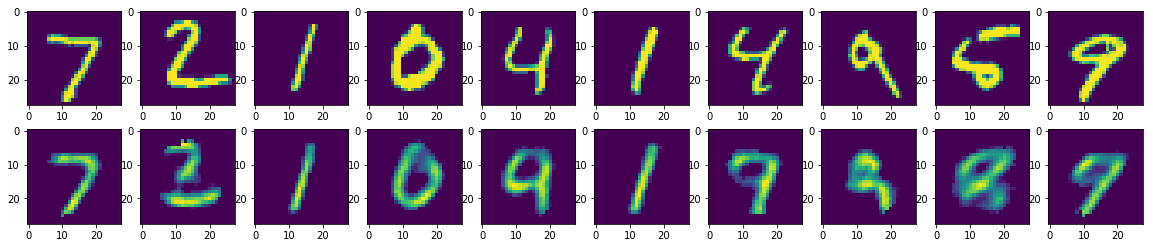

In [11]:
num_images = 10

with tf.Session() as sess:
    saver.restore(sess, './checkpoints/stacked_autoencoder.ckpt')
    results = output_layer.eval(feed_dict={X: mnist.test.images[:num_images]})

f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(results[i], (28,28)))